['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
Model loaded successfully.


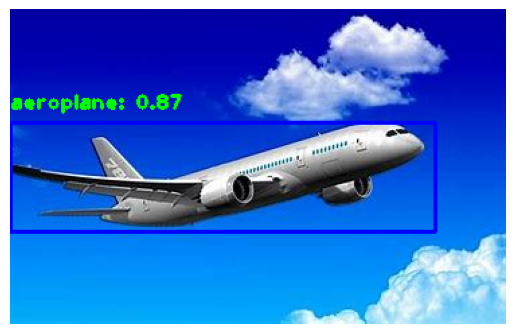

In [1]:
import cv2
import matplotlib.pyplot as plt

config_file = "obj detection files/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model = "obj detection files/frozen_inference_graph.pb"

try:
    net = cv2.dnn.readNet(frozen_model, config_file)
    model = cv2.dnn_DetectionModel(net)
    
    class_labels = []
    file_name = "obj detection files/labels.txt"
    with open(file_name, 'r') as f:
        class_labels = f.read().strip().split('\n')

    print(class_labels)

    model.setInputSize(320, 320)
    model.setInputScale(1.0 / 127.5)
    model.setInputMean((127.5, 127.5, 127.5))
    model.setInputSwapRB(True)
    print("Model loaded successfully.")

except cv2.error as e:
    print(f"OpenCV error: {e}")

except Exception as e:
    print(f"An error occurred: {e}")

file_path = "aero.jpeg"
img = cv2.imread(file_path)

if img is None:
    print(f"Failed to load image: {file_path}")
else:
    ClassIndex, confidences, boxes = model.detect(img, confThreshold=0.5)
    
    font = cv2.FONT_HERSHEY_PLAIN
    font_scale = 1
    font_color = (0, 255, 0)
    font_thickness = 2

    for index, confidence, box in zip(ClassIndex.flatten(), confidences.flatten(), boxes):
        x, y, w, h = box
        label = f"{class_labels[index-1]}: {confidence:.2f}" if index-1 < len(class_labels) else f"Class {index}, Conf: {confidence:.2f}"
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(img, label, (x, y-10), font, font_scale, font_color, font_thickness)

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()


In [ ]:


cap = cv2.VideoCapture("videoplayback.mp4")

if not cap.isOpened():
    raise IOError("Can't open the video")

font = cv2.FONT_HERSHEY_PLAIN
font_scale = 1
font_color = (0, 255, 0)
font_thickness = 2

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Perform object detection
    (ClassIndex, confidences, boxes) = model.detect(frame, confThreshold=0.5)
    
    for index, confidence, box in zip(ClassIndex, confidences, boxes):
        x, y, w, h = box
        if index < len(class_labels):
            label = f"{class_labels[index - 1]}: {confidence:.2f}"
        else:
            label = f"Class {index}: {confidence:.2f}"
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.putText(frame, label, (x + 10, y + 10), font, font_scale, font_color, font_thickness)

    cv2.imshow("Object Detection", frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [4]:
#webcam
class_labels = []
file_name = "obj detection files/labels.txt"
with open(file_name, 'r') as f:
    class_labels = f.read().strip().split('\n')

cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        raise IOError("Can't open the video")

font = cv2.FONT_HERSHEY_PLAIN
font_scale = 3
font_color = (0, 255, 0)
font_thickness = 2

while True:
    ret, frame = cap.read()
    if not ret:
        break

    ClassIndex, confidences, boxes = model.detect(frame, confThreshold=0.55)

    if ClassIndex is not None and len(ClassIndex) > 0:
        for index, confidence, box in zip(ClassIndex.flatten(), confidences.flatten(), boxes):
            x, y, w, h = box
            label = f"{class_labels[index-1]}: {confidence:.2f}" if index-1 < len(class_labels) else f"Class {index}, Conf: {confidence:.2f}"
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
            cv2.putText(frame, label, (x + 10, y + 40), font, font_scale, font_color, font_thickness)

    cv2.imshow("Object Detection", frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


KeyboardInterrupt: 